# <p style="padding:10px;background-color:#8DA48E ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Table of Contents 💼 🗝️</p>



<div style = 'border : 3px solid lightblue; background-color:#ABB9AB;padding:10px'>


* **[1.The purpose of the project 📜](#1)**

  - A simple definition of the idea of ​​the project
    
    
* **[2.Importing libraries 📚](#2)**  

   - Recall the most important libraries through which the project is completed 
    
 
* **[3.Exploratory data analysis (EDA) 📊](#3)**  

    - Knowledge of information through data and its representation in graphs

    - Know the parts that are not clear in the data in its normal form
      
    
* **[4.Data preprocessing 🔧](#4)**  
    
   - Data splitting 
    
   - Data generators 

    
* **[5.loading the model](#5)**  
    
    - Call backs
    
    - Training the model
    
    - plotting the model
    
    
* **[6.Model evaluation 📈](#6)**  
   
    - Classification report
    
    - Confusion matrix
    
    - ROC, Recall

    - Sensitivity, Specificity
    
    
 * **[7.Grad-Cam(HeatMap),Lime,SHAP](#7)**
    
    - Simply how cnn see
   
    

<a id="1"></a>
# <p style="padding:10px;background-color:#8DA48E ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">The purpose of the project 📜</p>

<div style = 'border : 3px solid lightblue; background-color:#ABB9AB;padding:10px'>

🔘 **The problem** : Rice is vulnerable to various diseases during its growth, such as blast, sheath blight, white leaf blight, etc. These diseases not only affect the growth and yield of rice, but also may lead to the decline of rice quality and bring economic losses to farmers. Therefore, accurate and rapid classification and identification of rice leaf diseases is of great significance for preventing and controlling rice diseases and improving rice yield and quality.
    
    
🔘 **Solution** : The rice leaf disease classification project based on CNN model aims to build a CNN model including multiple convolution layers, pooling layers and fully connected layers by collecting a large amount of rice leaf disease image data, and realize automatic recognition and classification of rice leaf diseases by training and optimizing the model. The implementation of the project will help to improve the accuracy and efficiency of rice leaf disease identification, and provide technical support for the sustainable development of rice planting industry.

<a id="2"></a>
# <p style="padding:10px;background-color:#8DA48E ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Importing libraries 📚</p>

In [1]:
import os
import glob as gb
import numpy as np 
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.cm as cm
import matplotlib.pyplot as plt
# plt.style.use('Solarize_Light2')

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping,ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,array_to_img,img_to_array

from sklearn.model_selection import train_test_split

<a id="3"></a>
# <p style="padding:10px;background-color:#8DA48E ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Exploratory data analysis (EDA) 📊 </p>




**<p style="color:#6D4318">Preparing all data paths</p>**


In [4]:
data_path=r'C:\\Users\\HP\\Desktop\\project\\Code\\Training all models\\RiceLeafsDisease\\training_1'

**<p style="color:#6D4318">Find out the number of images in each folder</p>**

**<p style="color:#6D4318">Creat images data frame</p>**



In [5]:
# System libraries
from pathlib import Path
import os.path

image_dir = Path(data_path)

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.JPG')) + list(image_dir.glob(r'**/*.jpg'))

labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)
image_df.head(5)

Filepath                  Label
0  C:\Users\HP\Desktop\project\Code\Training all ...  bacterial_leaf_blight
1  C:\Users\HP\Desktop\project\Code\Training all ...  bacterial_leaf_blight
2  C:\Users\HP\Desktop\project\Code\Training all ...  bacterial_leaf_blight
3  C:\Users\HP\Desktop\project\Code\Training all ...  bacterial_leaf_blight
4  C:\Users\HP\Desktop\project\Code\Training all ...  bacterial_leaf_blight

**<p style="color:#6D4318">Find out the distribution of each title in our data </p>**


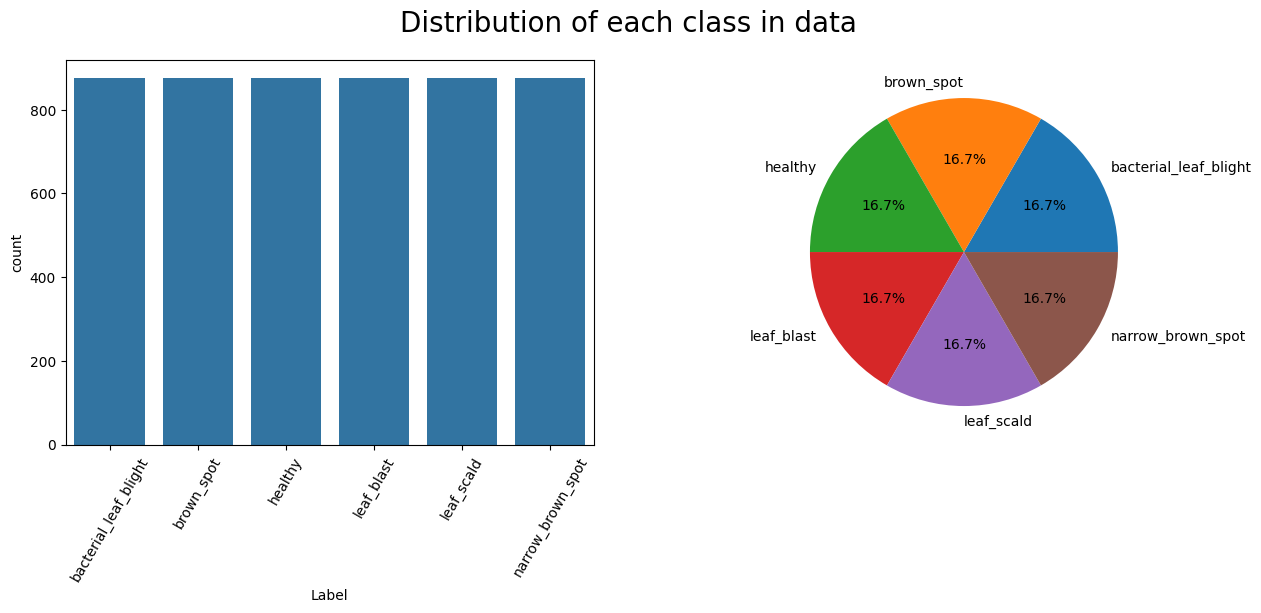

In [6]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data=image_df,x='Label')
plt.xticks(rotation = 60)
plt.subplot(1,2,2)
plt.pie(x=image_df['Label'].value_counts().values,labels=image_df['Label'].value_counts().index,autopct='%1.1f%%')
plt.suptitle('Distribution of each class in data',size=20)
plt.show()


<div style = 'border : 3px solid lightblue; background-color:#ABB9AB;padding:10px'>
    
**<p style="color:red">Observations 📋</p>**    
    
🔘 The data is balanced so that each class contains an equal number of images **(1000)** images

**<p style="color:#6D4318">Display 20 pictures of the dataset </p>**


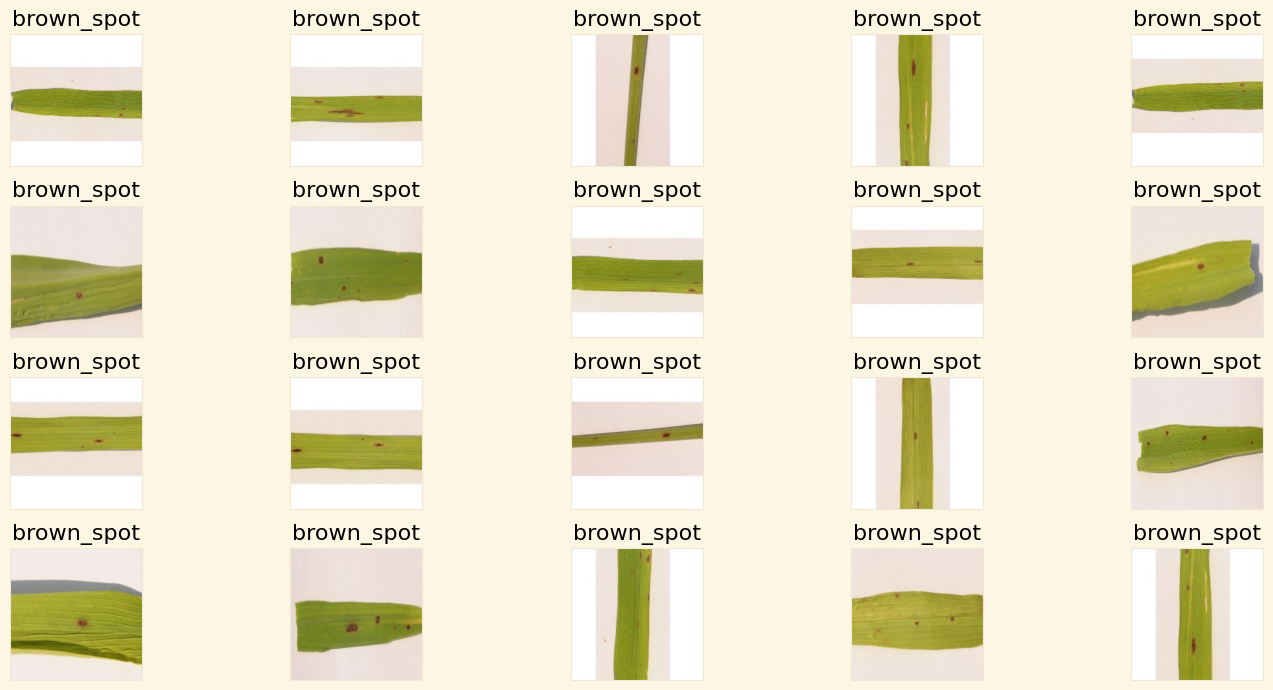

In [5]:
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[i]))
    ax.set_title(image_df.Label[i])
plt.tight_layout()
plt.show()

<a id="4"></a>
# <p style="padding:10px;background-color:#8DA48E ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data preprocessing 🔧 </p>

**<p style="color:#6D4318">Data splitting </p>**


In [7]:
training_df,testing_df=train_test_split(image_df,test_size=0.2,shuffle=True,random_state=1)

print('The dimension of training data :',training_df.shape)
print('The dimension of testing data :',testing_df.shape)

The dimension of training data : (2102, 2)
The dimension of testing data : (526, 2)


**<p style="color:#6D4318">Data generators </p>**


In [8]:
training_generator=ImageDataGenerator(rescale=1./255, rotation_range=40,shear_range=0.2, zoom_range=0.2,width_shift_range=0.2,horizontal_flip=True,validation_split=0.2)

testing_generator=ImageDataGenerator(rescale=1./255, rotation_range=40,shear_range=0.2, zoom_range=0.2,width_shift_range=0.2,horizontal_flip=True)
                                    

In [9]:
training_images=training_generator.flow_from_dataframe(

    dataframe=training_df,
    x_col='Filepath',
    y_col='Label',
    class_mode='categorical',
    target_size=(250, 250),    
    color_mode='rgb',
    batch_size=16,
    shuffle=True,
    seed=42,
    subset='training'
    
)


validation_images=training_generator.flow_from_dataframe(


    dataframe=training_df,
    x_col='Filepath',
    y_col='Label',
    class_mode='categorical',
    target_size=(250,250),
    color_mode='rgb',
    batch_size=16,
    shuffle=True,
    seed=42,
    subset='validation'

)


testing_images=testing_generator.flow_from_dataframe(


    dataframe=testing_df,
    x_col='Filepath',
    y_col='Label',
    class_mode='categorical',
    target_size=(250,250),
    color_mode='rgb',
    batch_size=16,
    shuffle=False,
)


Found 1682 validated image filenames belonging to 6 classes.
Found 420 validated image filenames belonging to 6 classes.
Found 526 validated image filenames belonging to 6 classes.


<a id="5"></a>
# <p style="padding:10px;background-color:#8DA48E ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">loading the model </p>




In [9]:
from keras.layers import Input, Conv2D, DepthwiseConv2D, Concatenate, Add, GlobalAveragePooling2D, Flatten, Dense, Dropout, BatchNormalization, AveragePooling2D

def inception_module(x, filters):
    # Branch 1:1 x1 convolution
    branch_1x1 = Conv2D(filters=filters[0], kernel_size=(1, 1), strides=1, padding='same', activation='relu')(x)

    # Branch 2: depth-separable convolution (3x3)
    branch_3x3 = DepthwiseConv2D(kernel_size=(3, 3), strides=1, padding='same', activation='relu')(x)
    branch_3x3 = Conv2D(filters=filters[1], kernel_size=(1, 1), strides=1, padding='same', activation='relu')(branch_3x3)

    # Branch 3: Depth-separable Convolution (5x5)
    branch_5x5 = DepthwiseConv2D(kernel_size=(5, 5), strides=1, padding='same', activation='relu')(x)
    branch_5x5 = Conv2D(filters=filters[2], kernel_size=(1, 1), strides=1, padding='same', activation='relu')(branch_5x5)

    # The branch 4:3x3 is maximized and then convolved with 1x1
    branch_pool = AveragePooling2D(pool_size=(3, 3), strides=1, padding='same')(x)
    branch_pool = Conv2D(filters=filters[3], kernel_size=(1, 1), strides=1, padding='same', activation='relu')(branch_pool)

    output = Concatenate(axis=-1)([branch_1x1, branch_3x3, branch_5x5, branch_pool])
    return output

def residual_block(x, filters, dropout_rate):
    # Save the input for subsequent residual connections
    shortcut = x

    # The first Inception module
    x = inception_module(x, filters)
    x = Dropout(dropout_rate)(x)
    # The Second Inception module
    x = inception_module(x, filters)
    x = Dropout(dropout_rate)(x)
    # If the input and output dimensions do not match, the dimensions are adjusted using 1x1 convolution
    if shortcut.shape[-1] != x.shape[-1]:
        shortcut = Conv2D(filters=x.shape[-1], kernel_size=(1, 1), strides=1, padding='same')(shortcut)

    # Residual connection
    x = Add()([shortcut, x])
    x = tf.keras.layers.Activation('relu')(x)
    return x


dropout_rate = 0.2
# Input Layer
input_layer = Input(shape=(250, 250, 3))

# Convolution layer
conv1 = Conv2D(64, (5, 5), strides=(2, 2), padding='same', activation='relu')(input_layer)

# Residual block
res_block1 = residual_block(conv1, [32, 64, 128, 32], dropout_rate)
res_block2 = residual_block(res_block1, [64, 64, 128, 32], dropout_rate)

pool2 = GlobalAveragePooling2D()(res_block2)
dense = Dense(2048, activation='relu')(pool2)
# Fully connected layer

output_layer = Dense(6, activation='softmax')(dense)

model = Model(inputs=input_layer, outputs=output_layer)

2024-04-18 15:16:46.655289: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-18 15:16:46.724450: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-18 15:16:46.724760: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

**<p style="color:#6D4318">Call backs</p>**

<div style = 'border : 3px solid lightblue; background-color:#ABB9AB;padding:10px'>

🔘 **Early Stopping** is a regularization technique for deep neural networks that stops training when parameter updates no longer begin to yield improves on a validation set.
    
🔘 **ReduceLROnPlateau** reduce learning rate when a metric has stopped improving,... 
    This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced.
 
    
🔘 **ModelCheckpoint** Callback to save the Keras model or model weights at some frequency.



In [11]:
early_stopping=EarlyStopping(monitor='val_loss',patience=5,verbose=1,restore_best_weights=True)

reduce_lr=ReduceLROnPlateau(monitor='val_loss',patience=5,verbose=0,factor=0.1)

model_check_point=ModelCheckpoint(monitor='val_accuracy',filepath='./bestmodel.h5',save_best_only=True,verbose=True)

**<p style="color:#6D4318">Training the model </p>**


In [12]:
epochs=50
batch_size=16

nb_train_samples = training_images.samples
nb_validation_samples = validation_images.samples


In [13]:
import time
# Record the start time of training
start_time = time.time()

In [14]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history=model.fit(
    
    training_images,
    steps_per_epoch=nb_train_samples // batch_size,
    validation_data=validation_images,
    epochs=epochs,
    batch_size=batch_size,
    validation_steps=nb_validation_samples // batch_size,
    callbacks=[early_stopping,reduce_lr,model_check_point]

)

Epoch 1/50


2024-04-18 15:17:28.113590: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-04-18 15:17:30.402127: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2024-04-18 15:17:32.954708: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1e965a60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-18 15:17:32.954801: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla V100-SXM2-16GB, Compute Capability 7.0
2024-04-18 15:17:33.039186: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-18 15:17:33.457745: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster

105/105 [==============================] - ETA: 0s - loss: 1.7397 - accuracy: 0.2305
Epoch 1: val_accuracy improved from -inf to 0.33654, saving model to ./bestmodel.h5
105/105 [==============================] - 46s 306ms/step - loss: 1.7397 - accuracy: 0.2305 - val_loss: 1.6182 - val_accuracy: 0.3365 - lr: 0.0010
Epoch 2/50
105/105 [==============================] - ETA: 0s - loss: 1.5731 - accuracy: 0.3157
Epoch 2: val_accuracy did not improve from 0.33654
105/105 [==============================] - 31s 291ms/step - loss: 1.5731 - accuracy: 0.3157 - val_loss: 1.5471 - val_accuracy: 0.3365 - lr: 0.0010
Epoch 3/50
104/105 [============================>.] - ETA: 0s - loss: 1.5257 - accuracy: 0.3576
Epoch 3: val_accuracy improved from 0.33654 to 0.38462, saving model to ./bestmodel.h5
105/105 [==============================] - 31s 289ms/step - loss: 1.5255 - accuracy: 0.3577 - val_loss: 1.4604 - val_accuracy: 0.3846 - lr: 0.0010
Epoch 4/50
105/105 [==============================] - ETA: 0

In [15]:
# Record the training end time
end_time = time.time()

In [16]:
training_time = end_time - start_time
print(f"Training time: {training_time} seconds")

Training time: 1106.1904034614563 seconds


**<p style="color:#6D4318">Model summary</p>**


In [17]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 250, 250, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 125, 125, 64)         4864      ['input_1[0][0]']             
                                                                                                  
 depthwise_conv2d (Depthwis  (None, 125, 125, 64)         640       ['conv2d[0][0]']              
 eConv2D)                                                                                         
                                                                                                  
 depthwise_conv2d_1 (Depthw  (None, 125, 125, 64)         1664      ['conv2d[0][0]']          

**<p style="color:#6D4318">plotting the model</p>**


In [18]:
tf.keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


**<p style="color:#6D4318">model history data frame</p>**


In [19]:
history_df=pd.DataFrame(history.history)
history_df

loss  accuracy  val_loss  val_accuracy     lr
0   1.739680  0.230492  1.618223      0.336538  0.001
1   1.573126  0.315726  1.547103      0.336538  0.001
2   1.525517  0.357743  1.460383      0.384615  0.001
3   1.360525  0.464586  1.298493      0.442308  0.001
4   1.114406  0.547419  1.029390      0.605769  0.001
5   1.028312  0.596639  1.197435      0.471154  0.001
6   0.863440  0.677071  1.013268      0.612981  0.001
7   0.851588  0.686074  0.893609      0.663462  0.001
8   0.768397  0.720288  0.881089      0.665865  0.001
9   0.731460  0.729292  1.002174      0.581731  0.001
10  0.637549  0.773709  0.831098      0.723558  0.001
11  0.622724  0.769508  0.707672      0.716346  0.001
12  0.578224  0.775510  0.567630      0.788462  0.001
13  0.500974  0.815126  0.559800      0.783654  0.001
14  0.477202  0.824130  0.586296      0.766827  0.001
15  0.580498  0.794118  0.731319      0.723558  0.001
16  0.520209  0.809124  0.622817      0.771635  0.001
17  0.439118  0.838535  0.445528      0.841346  0.001
18  0.369704  0.860144  0.493253      0.814904  0.001
19  0.425583  0.844538  0.487561      0.814904  0.001
20  0.442005  0.838535  0.471442      0.819712  0.001
21  0.359696  0.870348  0.508915      0.810096  0.001
22  0.334084  0.875750  0.413827      0.846154  0.001
23  0.315687  0.878151  0.380262      0.865385  0.001
24  0.312982  0.884154  0.526198      0.822115  0.001
25  0.304801  0.885954  0.388988      0.862981  0.001
26  0.360169  0.853541  0.480883      0.843750  0.001
27  0.297922  0.884154  0.488010      0.829327  0.001
28  0.274980  0.907563  0.319529      0.877404  0.001
29  0.291671  0.888956  0.372133      0.853365  0.001
30  0.230879  0.908163  0.321264      0.884615  0.001
31  0.258721  0.902761  0.421408      0.862981  0.001
32  0.279287  0.893758  0.342317      0.884615  0.001
33  0.239598  0.912365  0.329310      0.877404  0.001

In [2]:
import joblib

# joblib.dump(history.history,'history_bestDepthInceptionResNet.pkl')
history_CNN1 = joblib.load('history_bestDepthInceptionResNet.pkl')

In [3]:
def plot_performance(model_name, acc, val_acc, loss, val_loss):
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('{} : Loss'.format(model_name), fontsize=12, fontweight='bold')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['train', 'test'], loc='upper right')

  plt.subplot(1,2,2)
  plt.plot(acc)
  plt.plot(val_acc)
  plt.title('{} : Accuracy'.format(model_name), fontsize=12, fontweight='bold')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['train', 'test'], loc='lower right')

  plt.tight_layout()

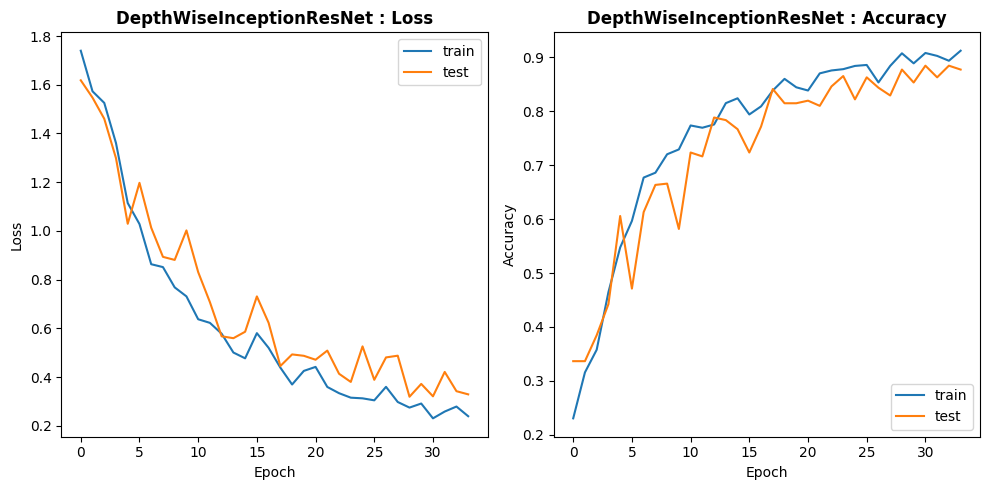

In [4]:
plot_performance(model_name='DepthWiseInceptionResNet',
                acc=history_CNN1['accuracy'], 
                 val_acc=history_CNN1['val_accuracy'],
                 loss=history_CNN1['loss'], 
                 val_loss=history_CNN1['val_loss'])

**<p style="color:#6D4318">Load the best validation accurecy model</p>**


In [4]:
from keras.models import load_model

model=load_model('bestmodel.h5')

2024-04-18 22:31:40.094038: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-18 22:31:40.229967: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-18 22:31:40.230398: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

**<p style="color:#6D4318">Evaluate the model on test data</p>**


In [26]:
Evaluation=model.evaluate(testing_images)


print("Test Accuracy: {:.2f}%".format(Evaluation[1] * 100))
print("Test Loss: {:.5f}".format(Evaluation[0]))


33/33 [==============================] - 7s 193ms/step - loss: 0.3750 - accuracy: 0.8498
Test Accuracy: 84.98%
Test Loss: 0.37505


In [27]:
val_loss = list()
val_accuracy = list()
test_loss= list()
test_accuracy = list()


score = model.evaluate(validation_images)
val_loss.append(score[0])
val_accuracy.append(score[1])
print('\nVal loss:', score[0])
print('Val accuracy:', score[1])

score = model.evaluate(testing_images)
print('\nTest loss:', score[0])
print('Test accuracy:', score[1])

test_loss.append(score[0])
test_accuracy.append(score[1])

27/27 [==============================] - 5s 182ms/step - loss: 0.3174 - accuracy: 0.8976

Val loss: 0.31741172075271606
Val accuracy: 0.8976190686225891
33/33 [==============================] - 6s 170ms/step - loss: 0.3810 - accuracy: 0.8536

Test loss: 0.38099488615989685
Test accuracy: 0.8536121845245361


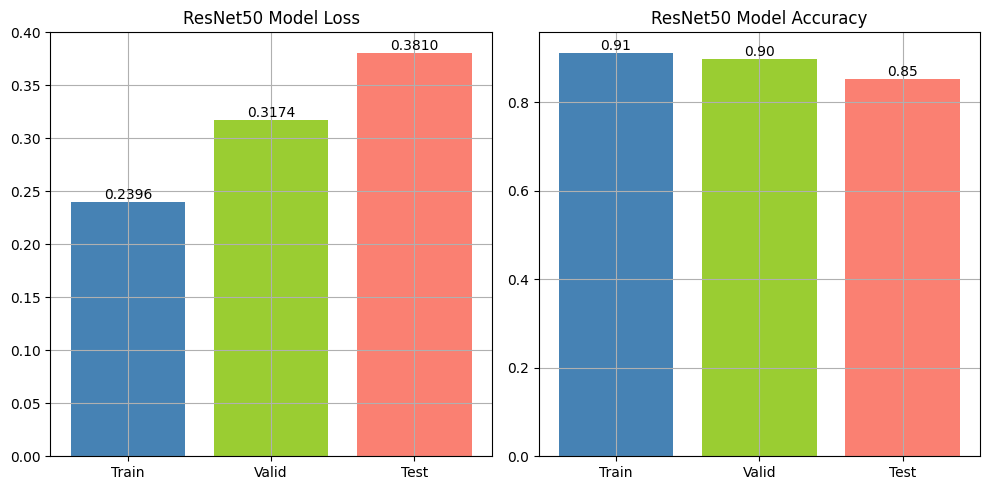

In [5]:
# Visualizing Model Performance
loss_values = [0.239598, 0.31741172075271606, 0.38099488615989685]  
accuracy_values = [0.912365, 0.8976190686225891, 0.8536121845245361] 

plt.figure(figsize=(10, 5))  
  
# 第一个子图：模型损失  
plt.subplot(1, 2, 1)  
plt.title("ResNet50 Model Loss")  
plt.bar(["Train", "Valid", "Test"], loss_values,color=['steelblue', 'yellowgreen', 'salmon'])  
  
# 为模型损失的每个条形添加数字标签  
for index, value in enumerate(loss_values):  
    plt.text(index, value, f'{value:.4f}', ha='center', va='bottom')  
  
plt.grid()  
  
# 第二个子图：模型准确率  
plt.subplot(1, 2, 2)  
plt.title("ResNet50 Model Accuracy")  
plt.bar(["Train", "Valid", "Test"], accuracy_values,color=['steelblue', 'yellowgreen', 'salmon'])  
  
# 为模型准确率的每个条形添加数字标签  
for index, value in enumerate(accuracy_values):  
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')  
  
plt.grid()  
  
# 显示图表  
plt.tight_layout()  # 确保子图之间不会重叠  
plt.show()

**<p style="color:#6D4318">Model prediction</p>**


In [17]:
prediction=model.predict(testing_images)
prediction=np.argmax(prediction,axis=1)

33/33 [==============================] - 7s 203ms/step


In [30]:
training_images.class_indices

{'bacterial_leaf_blight': 0,
 'brown_spot': 1,
 'healthy': 2,
 'leaf_blast': 3,
 'leaf_scald': 4,
 'narrow_brown_spot': 5}

In [31]:
labels = (training_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
prediction = [labels[k] for k in prediction]

<a id="6"></a>
# <p style="padding:10px;background-color:#8DA48E ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Model evaluation 📈 </p>



In [5]:
import itertools

#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

2024-04-18 22:32:46.016453: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2024-04-18 22:32:50.316753: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


33/33 [==============================] - 14s 185ms/step
Classification Report
                       precision    recall  f1-score   support

bacterial_leaf_blight       0.95      0.97      0.96        78
           brown_spot       0.65      0.82      0.73        90
              healthy       0.93      0.81      0.87        96
           leaf_blast       0.92      0.71      0.80        95
           leaf_scald       0.99      0.99      0.99        79
    narrow_brown_spot       0.87      0.95      0.91        88

             accuracy                           0.87       526
            macro avg       0.88      0.88      0.88       526
         weighted avg       0.88      0.87      0.87       526



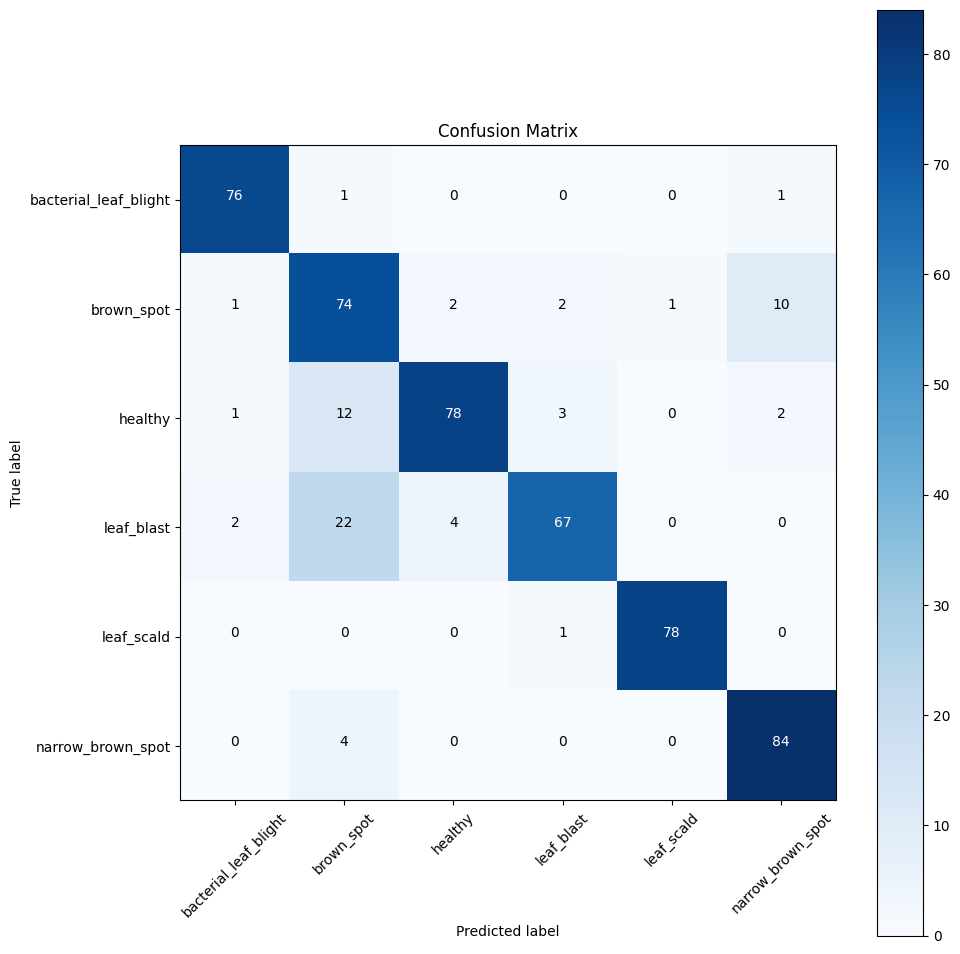

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

#Confution Matrix and Classification Report
Y_pred = model.predict(testing_images)#, nb_test_samples // BATCH_SIZE, workers=1)
y_pred = np.argmax(Y_pred, axis=1)
classes = list(training_images.class_indices.keys())
target_names = classes

#Confution Matrix
cm = confusion_matrix(testing_images.classes, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')
print('Classification Report')
print(classification_report(testing_images.classes, y_pred, target_names=target_names, zero_division=1))

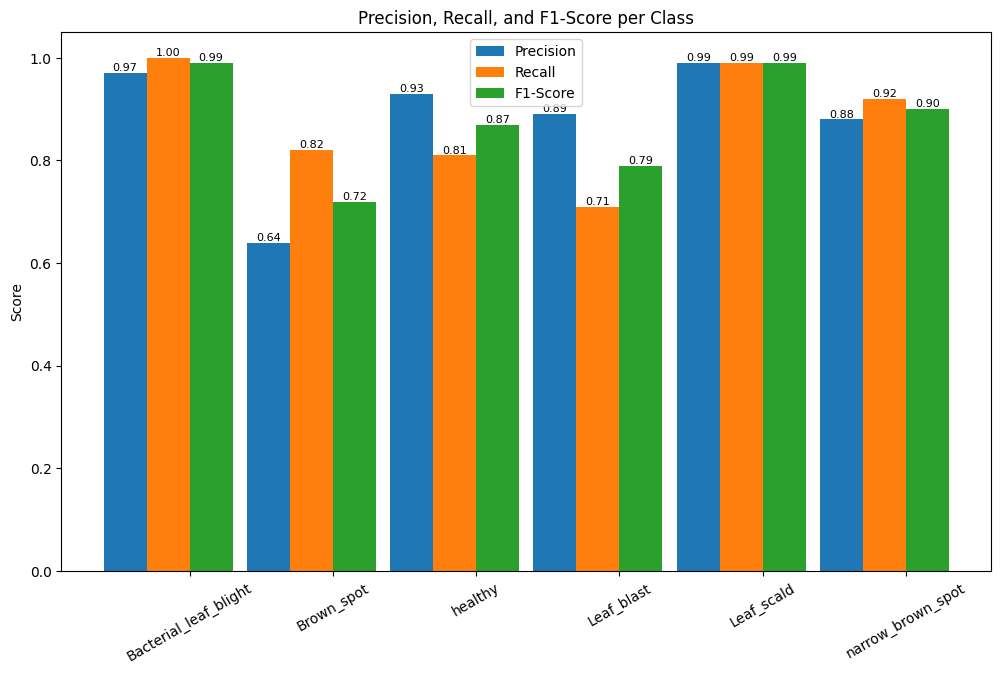

In [6]:
data = [['Bacterial_leaf_blight', 0.97, 1.00, 0.99],  
         ['Brown_spot', 0.64, 0.82, 0.72], 
         ['healthy', 0.93, 0.81, 0.87], 
         ['Leaf_blast', 0.89, 0.71, 0.79],
         ['Leaf_scald', 0.99, 0.99, 0.99],
         ['narrow_brown_spot', 0.88, 0.92, 0.90]]  
  
# 创建DataFrame  
df = pd.DataFrame(data, columns=['Classes', 'precision', 'recall', 'f1-score'])  
  
# 设置图形的宽度和位置  
N = len(df)  
ind = range(N)  
width = 0.3  # 条形图的宽度  
fig, ax = plt.subplots(figsize=(12, 7))
  
# 绘制precision的条形图  
precision_bars = plt.bar(ind, df['precision'], width, label='Precision')  
  
# 绘制recall的条形图，位置稍微偏移一点以便区分  
recall_bars = plt.bar([i + width for i in ind], df['recall'], width, label='Recall')  
  
# 绘制f1-score的条形图，再偏移一点  
f1_bars=plt.bar([i + width*2 for i in ind], df['f1-score'], width, label='F1-Score')  
  
# 添加类名到x轴  
plt.xticks([i + width*1.5 for i in ind], df['Classes'], rotation=30)  
  
# 设置y轴的标签  
plt.ylabel('Score')  
  
# 添加标题  
plt.title('Precision, Recall, and F1-Score per Class')  
  
# 添加图例  
plt.legend()  

# 为每个条形添加数字标签  
def add_value_labels(bars, fontsize=8):  
    for bar in bars:  
        height = bar.get_height()  
        plt.text(bar.get_x() + bar.get_width()/2, height,  
                 '{:.2f}'.format(height),  
                 ha='center', va='bottom', fontsize=fontsize)  
  
add_value_labels(precision_bars)  
add_value_labels(recall_bars)  
add_value_labels(f1_bars)  
  
# 显示图形  
plt.show()

In [36]:
y_true=testing_df['Label'].values
print(classification_report(y_true,prediction))

                       precision    recall  f1-score   support

bacterial_leaf_blight       0.96      0.97      0.97        78
           brown_spot       0.65      0.86      0.74        90
              healthy       0.95      0.81      0.88        96
           leaf_blast       0.91      0.67      0.78        95
           leaf_scald       0.99      0.99      0.99        79
    narrow_brown_spot       0.86      0.94      0.90        88

             accuracy                           0.87       526
            macro avg       0.89      0.87      0.87       526
         weighted avg       0.88      0.87      0.87       526



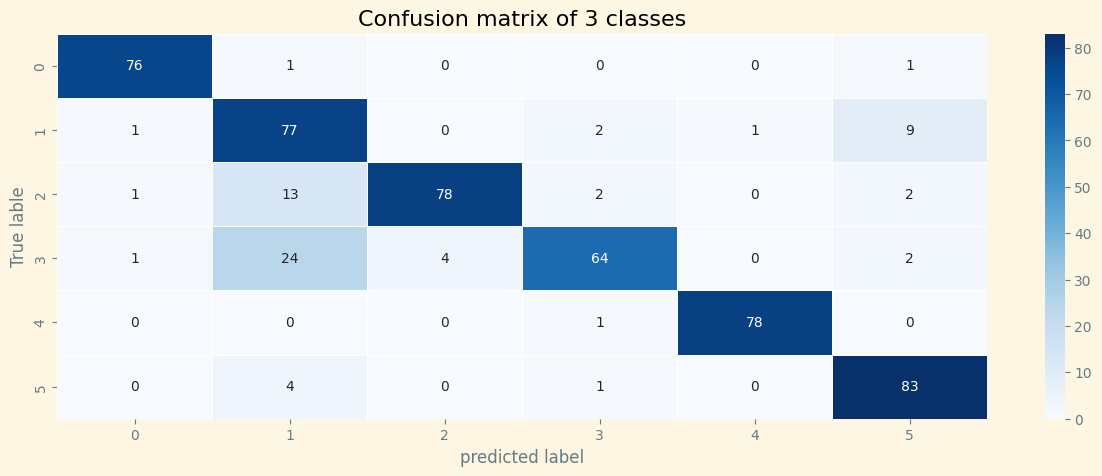

In [37]:
cm=confusion_matrix(y_true,prediction)
plt.figure(figsize=(15,5))
sns.heatmap(cm,annot=True,cmap='Blues',linewidths=0.5)
plt.xlabel('predicted label')
plt.ylabel('True lable')
plt.title('Confusion matrix of 3 classes')
plt.show()

33/33 [==============================] - 7s 204ms/step


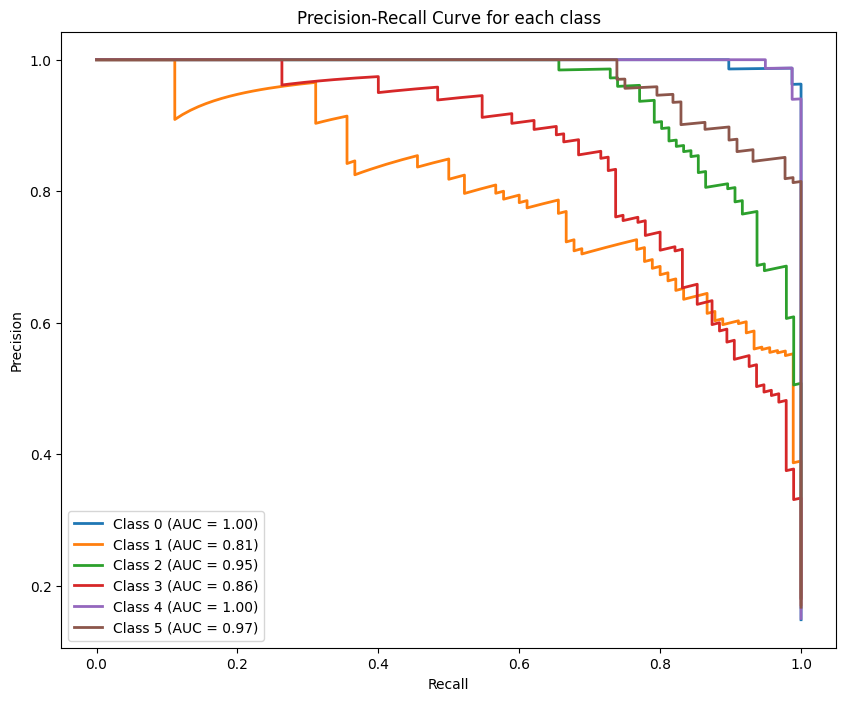

In [11]:
# Precision-Recall Curve for each class
from sklearn.metrics import precision_recall_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt


classes = list(training_images.class_indices.keys())
Y_pred= model.predict(testing_images)
n_classes = len(classes)
y_true_bin = label_binarize(testing_images.classes, classes=list(range(n_classes)))
precision = dict()
recall = dict()
auc_score = dict()

plt.figure(figsize=(10, 8))

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_true_bin[:, i], Y_pred[:, i])
    auc_score[i] = auc(recall[i], precision[i])
    
    plt.plot(recall[i], precision[i], lw=2, label=f'Class {i} (AUC = {auc_score[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for each class')
plt.legend(loc="best")
plt.show()

In [12]:
#Generate predictions for the test dataset
y_pred_labels = (Y_pred>0.5).astype(int)

#Get the true labels from thee test generator
y_true = testing_images.classes

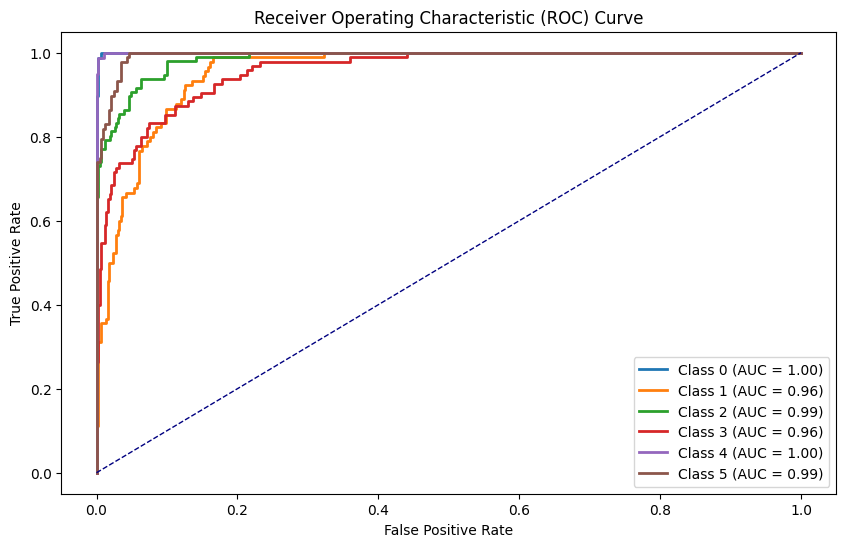

In [13]:
# Compute ROC curve
from sklearn.metrics import roc_curve, auc

#Get the true labels from thee test generator
# y_true = test_generator.classes
y_true_bin = label_binarize(y_true, classes=list(range(n_classes)))

# Initialize arrays to store fpr, tpr, and auc for each class
fpr = dict()
tpr = dict()
roc_auc = dict()


# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [14]:
# Initialize the list of Sensitivity and Specificity for each class
sensitivity_list = []
specificity_list = []

# The Sensitivity and Specificity of each class were calculated
for i in range(len(cm)):
    tp = cm[i, i]  # True Positive
    fn = np.sum(cm[i, :]) - tp  # False Negative
    fp = np.sum(cm[:, i]) - tp  # False Positive
    tn = np.sum(cm) - (tp + fn + fp)  # True Negative
    
    sensitivity = tp / (tp + fn + 1e-10)  # Add a small number to avoid dividing by zero
    specificity = tn / (tn + fp + 1e-10)
    
    sensitivity_list.append(sensitivity)
    specificity_list.append(specificity)

# Output Sensitivity and Specificity for each category
for idx, (sen, spec) in enumerate(zip(sensitivity_list, specificity_list)):
    print(f"Class {idx} - Sensitivity: {sen}, Specificity: {spec}")

Class 0 - Sensitivity: 0.9743589743577251, Specificity: 0.9910714285712073
Class 1 - Sensitivity: 0.8222222222213086, Specificity: 0.9105504587153875
Class 2 - Sensitivity: 0.8124999999991537, Specificity: 0.9860465116276776
Class 3 - Sensitivity: 0.7052631578939944, Specificity: 0.9860788863106761
Class 4 - Sensitivity: 0.9873417721506489, Specificity: 0.9977628635344524
Class 5 - Sensitivity: 0.9545454545443698, Specificity: 0.9703196347029749


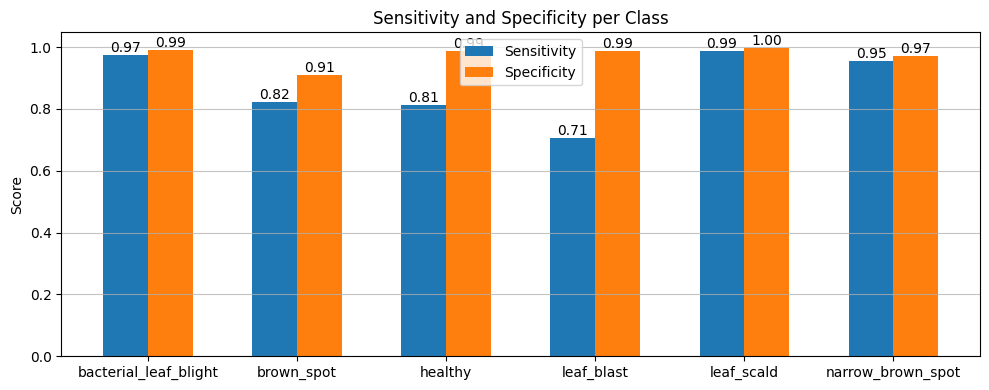

In [15]:
# 设置图形的宽度和位置  
N = len(sensitivity_list)  
ind = np.arange(N)  
width = 0.3  # 每个条形图的宽度  
  
# 绘制灵敏度的条形图  
plt.figure(figsize=(10, 4))  
sensitivity_bars = plt.bar(ind, sensitivity_list, width, label='Sensitivity')  
  
# 绘制特异度的条形图（注意：位置需要偏移以避免重叠）  
specificity_bars = plt.bar(ind + width, specificity_list, width, label='Specificity')  
   
plt.xticks(ind + width / 2, classes)  
  
# 设置x轴的标签为类别索引（如果没有具体的类标签列表）  
# plt.xticks(ind + width / 2, range(1, N + 1))  
  
# 设置y轴的标签  
plt.ylabel('Score')  
  
# 添加标题  
plt.title('Sensitivity and Specificity per Class')  
  
# 添加图例  
plt.legend()  
  
# 显示网格线  
plt.grid(axis='y', alpha=0.75)  
  
# 调整x轴和y轴的边距，以确保条形图完全可见  
plt.tight_layout()  
  
# 为每个条形添加数字标签  
def add_value_labels(bars, values):  
    for bar, value in zip(bars, values):  
        height = bar.get_height()  
        plt.text(bar.get_x() + bar.get_width() / 2, height,  
                 '{:.2f}'.format(value),  
                 ha='center', va='bottom')  
  
add_value_labels(sensitivity_bars, sensitivity_list)  
add_value_labels(specificity_bars, specificity_list)  
  
# 显示图形  
plt.show()

**<p style="color:#6D4318">preparing dataframe for predicted values</p>**


In [18]:
temp_df=testing_df.copy()
temp_df['predicted']=prediction

temp_df.loc[temp_df['Label']==temp_df['predicted'],'Same'] = 'True'
temp_df.loc[temp_df['Label']!=temp_df['predicted'],'Same'] = 'False'
temp_df=temp_df.reset_index(drop=True)
temp_df.head()

Filepath                  Label  \
0               data/brown_spot/brown_spot (231).JPG             brown_spot   
1                     data/healthy/healthy (216).jpg                healthy   
2      data/narrow_brown_spot/narrow_brown (107).jpg      narrow_brown_spot   
3  data/bacterial_leaf_blight/bacterial_leaf_blig...  bacterial_leaf_blight   
4                     data/healthy/healthy (201).jpg                healthy   

   predicted   Same  
0          1  False  
1          3  False  
2          5  False  
3          0  False  
4          2  False

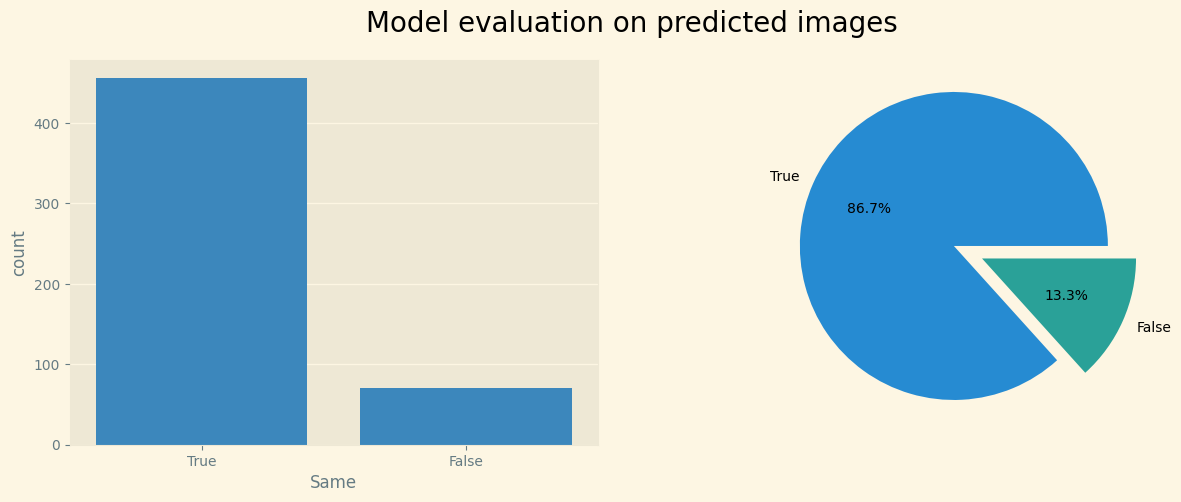

In [44]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(data=temp_df,x='Same')

plt.subplot(1,2,2)
plt.pie(x=temp_df['Same'].value_counts().values,labels=temp_df['Same'].value_counts().index,
        autopct='%1.1f%%',explode=[0.1,0.1])

plt.suptitle('Model evaluation on predicted images',size=20)
plt.show()

In [45]:
def display_image(temp_df):
    
    '''
    input : data frame 
    
    output : display 8 images from data frame with 
    '''
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(plt.imread(temp_df.Filepath.iloc[i]))
        ax.set_title(f"True: {temp_df.Label.iloc[i]}\nPredicted: {temp_df.predicted.iloc[i]}") 
    plt.tight_layout()
    plt.show()

**<p style="color:#6D4318">Displaying true predicted images</p>**


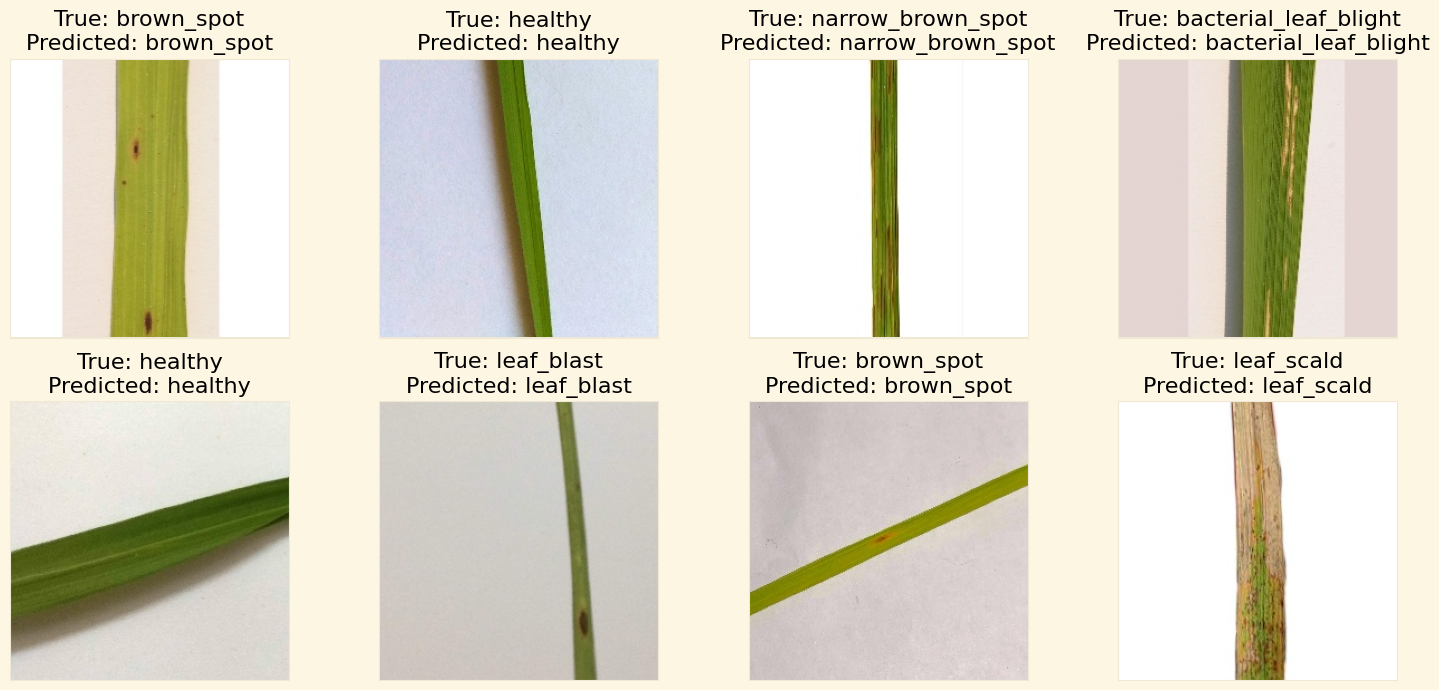

In [46]:
display_image(temp_df[temp_df['Same']=='True'])

**<p style="color:#6D4318">Displaying false predicted images</p>**


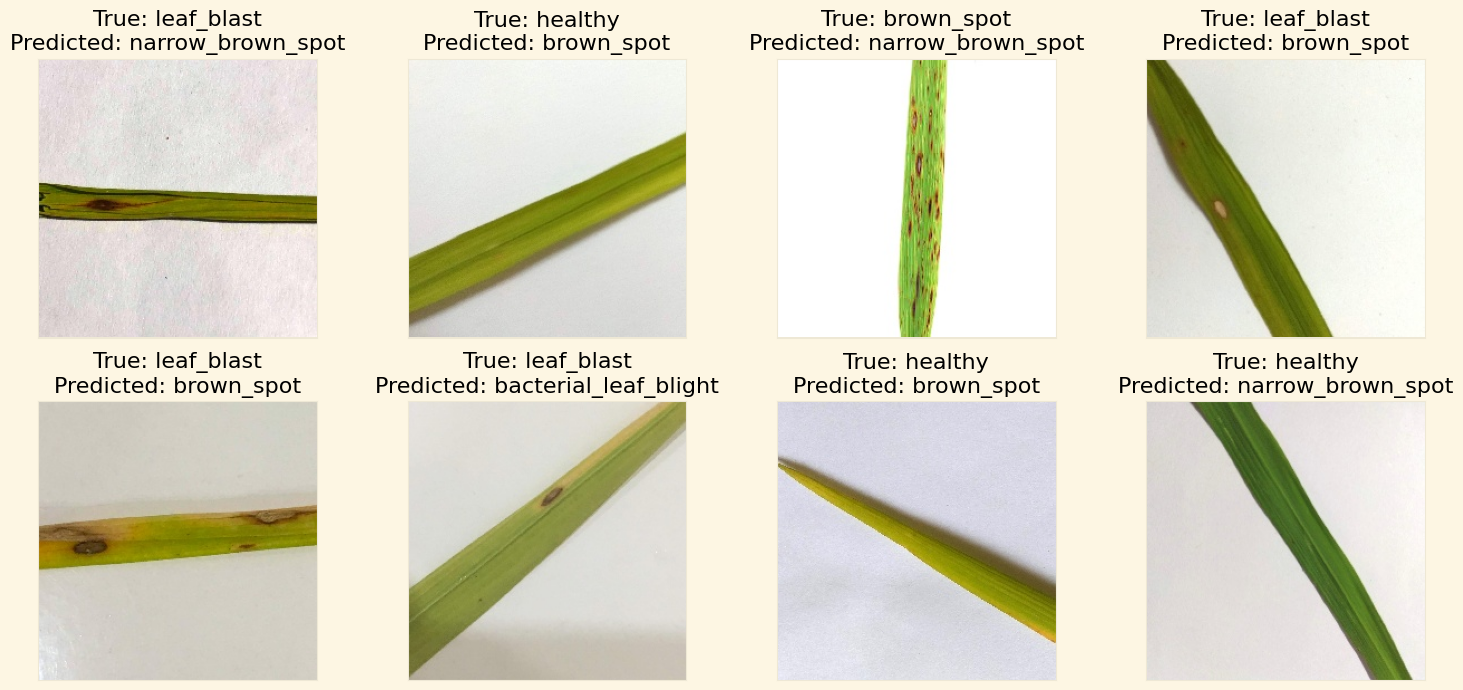

In [47]:
display_image(temp_df[temp_df['Same']=='False'])

<a id="7"></a>
# <p style="padding:10px;background-color:#8DA48E ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Grad-Cam </p>

<div style = 'border : 3px solid lightblue; background-color:#ABB9AB;padding:10px'>

🔘 Returns the gradient-weighted class activation mapping **(Grad-CAM)**
    
🔘 uses the gradient information flowing into the last convolutional layer of the CNN to understand each neuron for a decision of interest.
    
    
🔘 The **Grad-CAM** method is used to extract the feature map for deep neural networks, and then the attention mechanism is used to extract the high-level attention maps. The attention map, which highlights the important region in the image for the target class, can be seen as a visual explanation of a deep neural network.    

In [30]:
#last_conv_layer='block5_conv3'# You can know it through model summary

In [48]:
import matplotlib.cm as cm

def get_img_array(img_path, size):
    img = load_img(img_path, target_size=size)
    array = img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    array = np.expand_dims(array, axis=0)
    return array

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = tf.keras.preprocessing.image.load_img(img_path)
    img = tf.keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
#     display(Image(cam_path))
    
    return cam_path
    
preprocess_input = tf.keras.applications.vgg16.preprocess_input
# decode_predictions = tf.keras.applications.vgg16.decode_predictions

last_conv_layer_name = "conv2d_18"#from model summary
img_size = (250,250)

# Remove last layer's softmax
model.layers[-1].activation = None

In [49]:
def display_heatmap_image(df):
    
    '''
    input : data frame 
    
    output : display 8 grad-cam images from data frame with 
    '''
    
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        img_path = df.Filepath.iloc[i]
        img_array = preprocess_input(get_img_array(img_path, size=img_size))
        heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
        cam_path = save_and_display_gradcam(img_path, heatmap)
        ax.imshow(plt.imread(cam_path))
        ax.set_title(f"True: {df.Label.iloc[i]}\nPredicted: {df.predicted.iloc[i]}")
    plt.tight_layout()
    plt.show()

**<p style="color:#6D4318">Displaying True predicted images heatmap</p>**


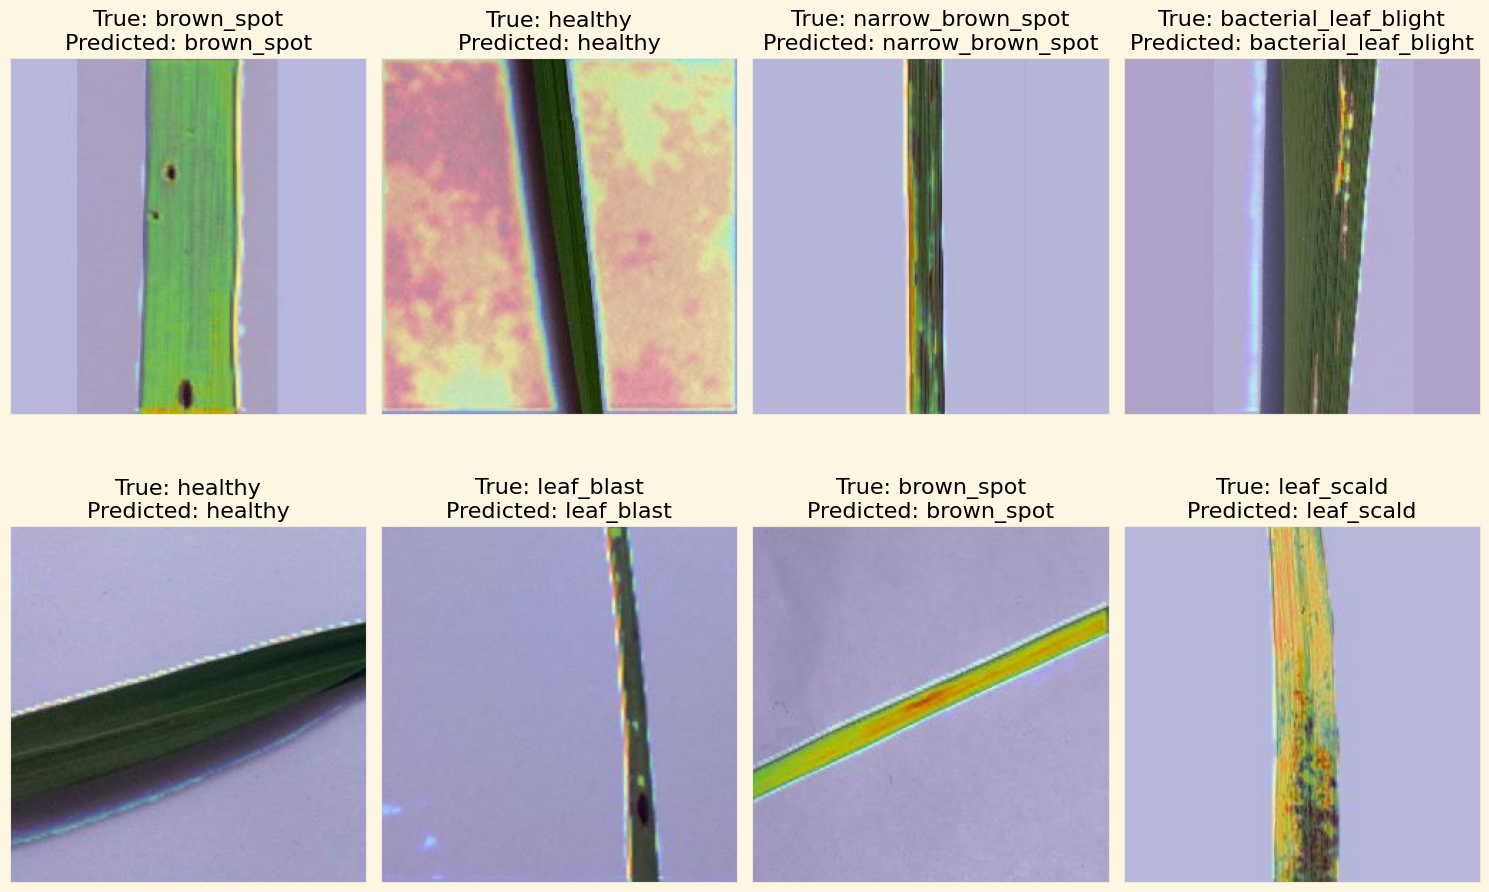

In [50]:
display_heatmap_image(temp_df[temp_df['Same']=='True'])

<div style = 'border : 3px solid lightblue; background-color:#ABB9AB;padding:10px'>
    
**<p style="color:red">Observations 📋</p>**    
    
🔘 The convolutional neural network determines the most important distinguishing features of each species of fish
    
🔘  The shaded part determines the basis for choosing the convolutional neural network for this classification 

**<p style="color:#6D4318">Displaying false predicted images heatmap</p>**


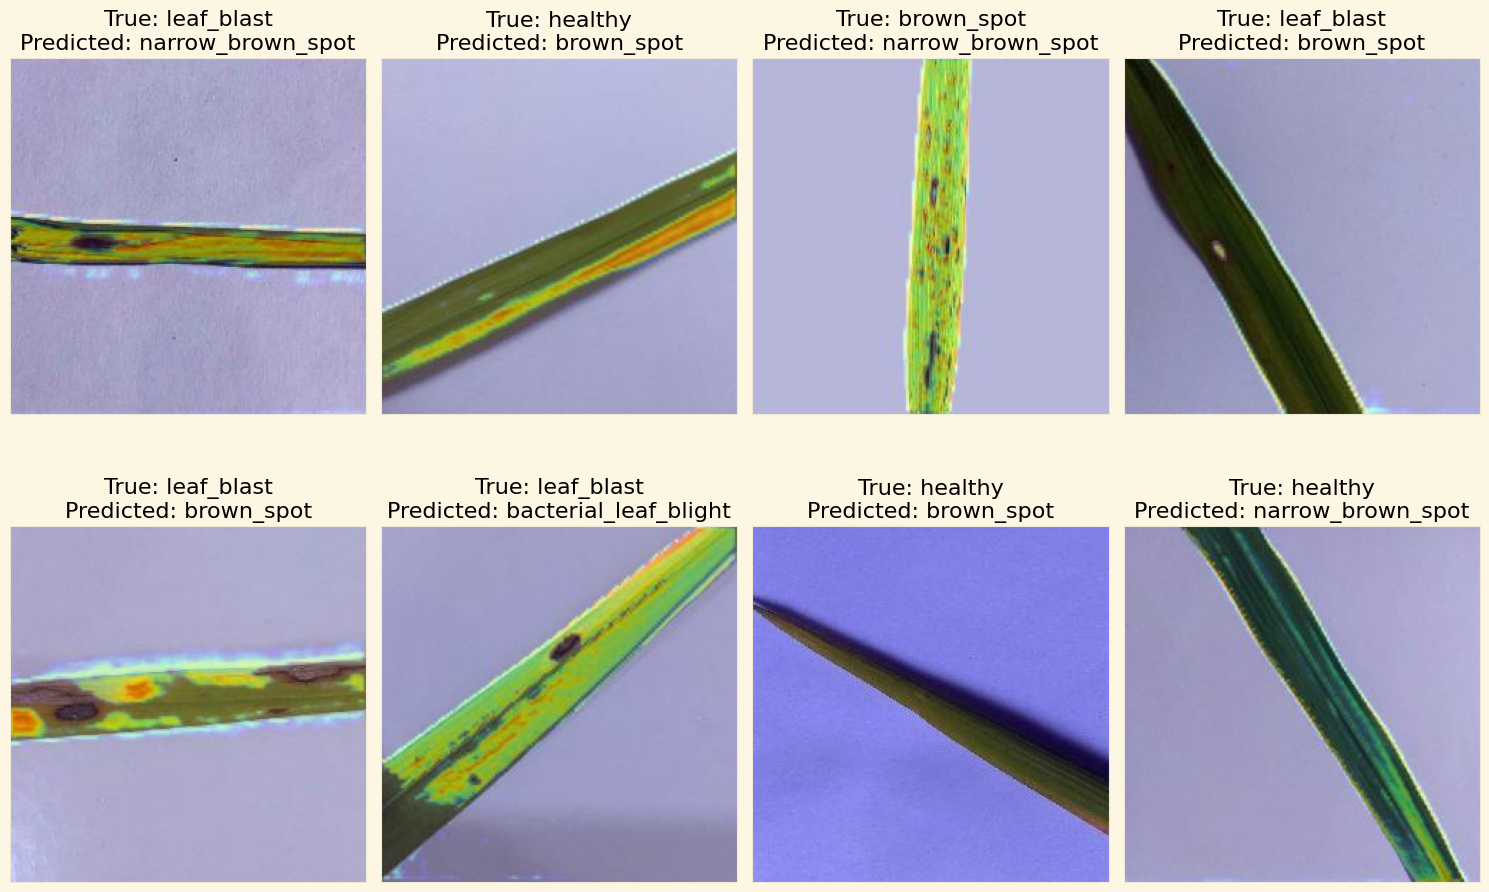

In [51]:
display_heatmap_image(temp_df[temp_df['Same']=='False'])

## HeatMap

In [52]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


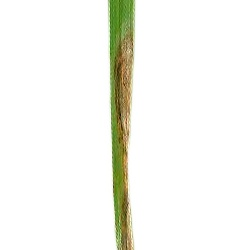

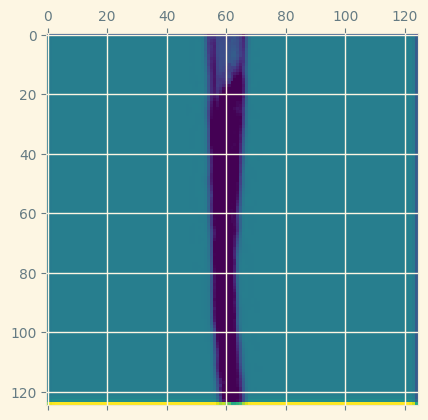

In [53]:
from IPython.display import Image, display
# The path to our target image
img_path = 'data/leaf_scald/leaf_scald (1).jpg'
display(Image(img_path))

img_array = get_img_array(img_path, size=img_size)

# Remove last layer's softmax
model.layers[-1].activation = None


# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

## Lime

In [55]:
#Lime package for ML explainability
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

In [57]:
import pathlib
data_dir = pathlib.Path(data_path)
train_set = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    class_names =  ['bacterial_leaf_blight', 'brown_spot', 'healthy', 'leaf_blast', 'leaf_scald', 'narrow_brown_spot'],
    subset="training",
    seed=42,
    image_size=(250, 250),
    batch_size=batch_size)

Found 2628 files belonging to 6 classes.
Using 2103 files for training.


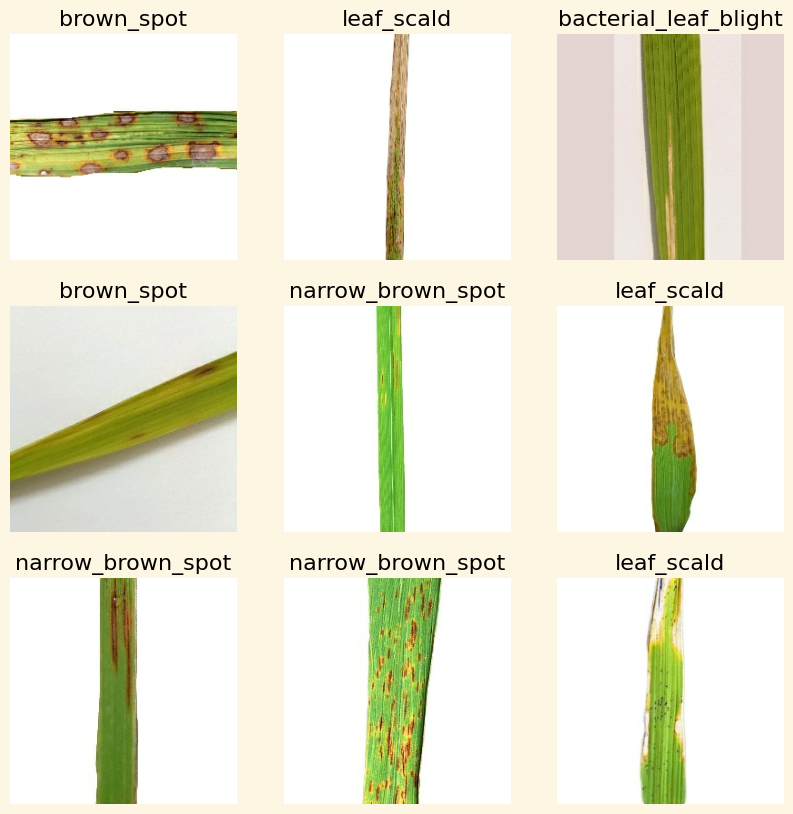

In [58]:
class_names = ['bacterial_leaf_blight', 'brown_spot', 'healthy', 'leaf_blast', 'leaf_scald', 'narrow_brown_spot']
plt.figure(figsize=(10, 10))
for images, labels in train_set.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [60]:
import tensorflow as tf  
  
# 假设 images 是一个包含张量的列表或数组  
images_double = [tf.cast(img, tf.float64) for img in images]


In [61]:
# 假设 explainer 是一个 LIME 解释器实例  
# 假设 images 是一个包含张量的列表或数组  
# 将 TensorFlow 张量转换为 NumPy 数组  
image_np = images[0].numpy()  
  
# 确保 NumPy 数组的数据类型是 double  
image_np_double = image_np.astype(np.float64)  

In [62]:
explainer = lime_image.LimeImageExplainer()

In [63]:
image_np_double_resized = np.resize(image_np_double, (250, 250, 3))  

In [66]:
# temp, mask = explainer.explain_instance(image_np_double_resized, model.predict, top_labels=len(class_names), hide_color=0, num_samples=100)

explanation = explainer.explain_instance(image_np_double_resized, model.predict, top_labels=len(class_names), hide_color=0, num_samples=100)  

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 0s 27ms/step


 10%|█         | 10/100 [00:00<00:01, 68.50it/s]

1/1 [==============================] - 0s 27ms/step


 20%|██        | 20/100 [00:00<00:01, 68.20it/s]

1/1 [==============================] - 0s 27ms/step


 30%|███       | 30/100 [00:00<00:01, 68.41it/s]

1/1 [==============================] - 0s 27ms/step


 40%|████      | 40/100 [00:00<00:00, 68.49it/s]

1/1 [==============================] - 0s 26ms/step


 50%|█████     | 50/100 [00:00<00:00, 68.68it/s]

1/1 [==============================] - 0s 27ms/step


 60%|██████    | 60/100 [00:00<00:00, 68.62it/s]

1/1 [==============================] - 0s 28ms/step


 70%|███████   | 70/100 [00:01<00:00, 68.74it/s]

1/1 [==============================] - 0s 26ms/step


 80%|████████  | 80/100 [00:01<00:00, 69.36it/s]

1/1 [==============================] - 0s 27ms/step


 90%|█████████ | 90/100 [00:01<00:00, 68.43it/s]

1/1 [==============================] - 0s 27ms/step


100%|██████████| 100/100 [00:01<00:00, 68.56it/s]


In [67]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=False) 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


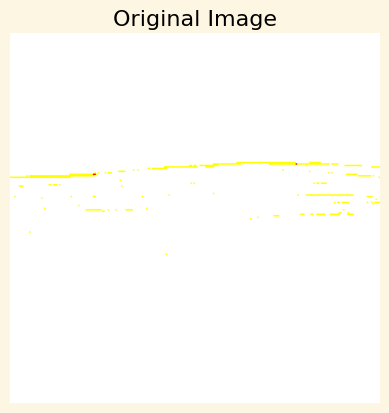

In [68]:
display_image = temp / mask.max()  
  
# 显示原图和解释的热度图  
plt.imshow(image_np_double_resized)  
plt.title('Original Image')  
plt.axis('off')  
plt.show()  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


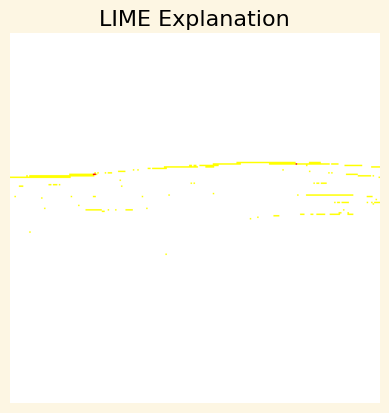

In [69]:
plt.imshow(display_image, cmap=plt.cm.viridis)  
plt.title('LIME Explanation')  
plt.axis('off')  
plt.show()

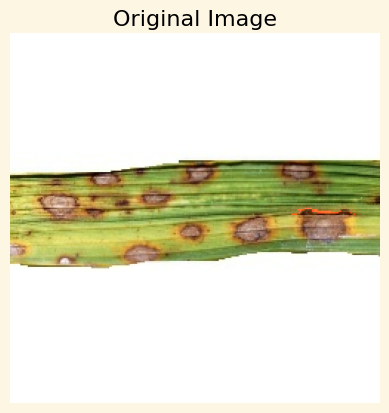

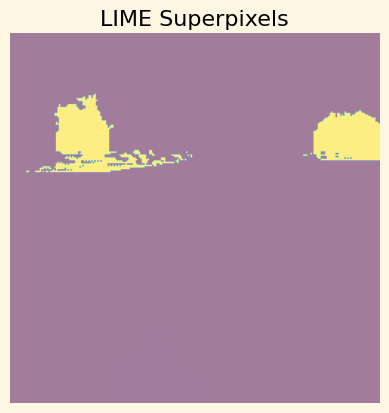

In [71]:
# 获取图像和遮罩的numpy数组  
img_array = temp.astype(np.uint8)  
mask_array = (mask * 255).astype(np.uint8)  
  
# 可视化解释结果  
plt.imshow(img_array)  
plt.title('Original Image')  
plt.axis('off')  
plt.show()  
  
plt.imshow(mask_array, cmap='viridis', alpha=0.5)  
plt.title('LIME Superpixels')  
plt.axis('off')  
plt.show()

## SHAP

In [72]:
# 创建一个可以处理单个输入的模型包装器  
def model_predict(x):  
    # 转换x的形状以匹配模型的输入  
    x = np.expand_dims(x, axis=0)  
    # 使用模型进行预测  
    preds = model.predict(x)  
    # 返回预测的类别概率（取最大概率对应的类别索引作为输出）  
    return np.argmax(preds, axis=-1)

In [73]:
from PIL import Image
# 加载图像并转换为NumPy数组  
image_pil = Image.open('data/leaf_scald/leaf_scald (1).jpg')  # 替换为你的图像路径  
image_np = np.array(image_pil)  
  
# 如果是RGB图像，确保有3个通道  
assert image_np.ndim == 3 and image_np.shape[2] == 3, "Image should be RGB"  
  
# 将像素值从0-255归一化到0-1  
image_np_double = image_np.astype(np.float32) / 255.0

In [77]:
import shap
from shap.maskers import Image

masker = Image(np.array([image_np_double]))
explainer = shap.Explainer(model_predict, masker=masker, output_index=0)


In [85]:
import cv2
expected_height, expected_width, channels =250, 250, 3  
resized_image = cv2.resize(image_np_double, (expected_width, expected_height))  
resized_image = resized_image.astype(np.float32)  


In [89]:
shap_values = explainer(np.array([resized_image]))

2024-04-18 16:03:30.768375: W tensorflow/core/framework/op_kernel.cc:1828] OP_REQUIRES failed at transpose_op.cc:142 : INVALID_ARGUMENT: transpose expects a vector of size 5. But input(1) is a vector of size 4


InvalidArgumentError: Graph execution error:

transpose expects a vector of size 5. But input(1) is a vector of size 4
	 [[{{node model/conv2d/Conv2D-0-TransposeNHWCToNCHW-LayoutOptimizer}}]] [Op:__inference_predict_function_46804]

<div style = 'border : 3px solid lightblue; background-color:#ABB9AB;padding:10px'>
    
**<p style="color:red">Observations 📋</p>**    
    
🔘 The inability of the convoluted neural network to see the parts clearly, perhaps due to the similarity of sizes or colors of two different species with the blurring of the image

<div style = 'border : 3px solid lightblue; background-color:#ABB9AB;padding:10px'>
    
# Thank you for watching to the end. If you benefit from this notebook, please support me with upvote ❤️